In [1]:
import torch
import matplotlib.pyplot as plt

from src.manifolds.deformed_gaussian_pullback_manifold.quadratic_banana_pullback_manifold import QuadraticBananaPullbackManifold

/Users/wdiepeveen/Documents/Postdoc/projects/1 - score-based Riemannian geometry/src/Score-based-Riemannian-geometry/.venv/lib/python3.8/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


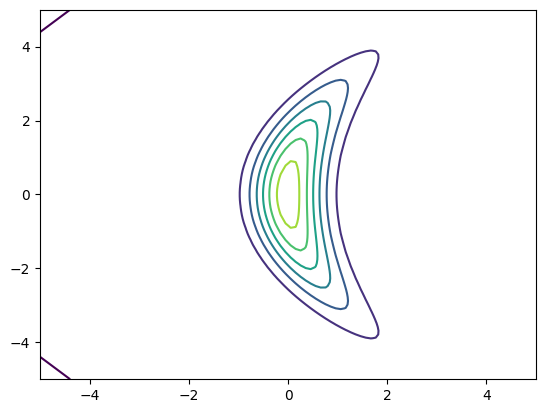

In [2]:
banana_manifold = QuadraticBananaPullbackManifold()

xx = torch.linspace(-5.0, 5.0, 100)
yy = torch.linspace(-5.0, 5.0, 100)
x_grid, y_grid = torch.meshgrid(xx, yy)

xy_grid = torch.zeros((*x_grid.shape,2))
xy_grid[:,:,0] = x_grid
xy_grid[:,:,1] = y_grid

density_banana = torch.exp(banana_manifold.dg.log_density(xy_grid.reshape(-1,2)).reshape(x_grid.shape))
plt.contour(x_grid, y_grid, density_banana)
plt.show()

In [3]:
# special points
x0 = torch.tensor([2.,4.])
x1 = torch.tensor([2.,-4.])

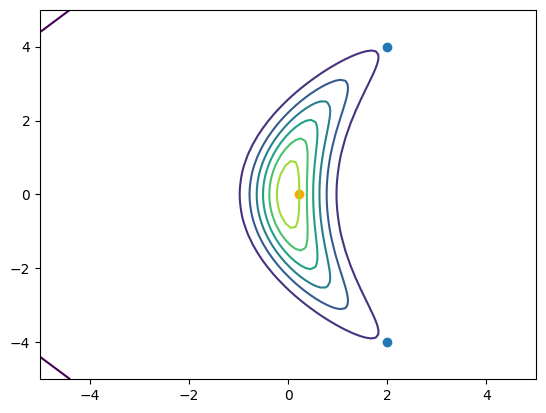

In [4]:
# test barycentre
x=torch.zeros((2,2))
x[0] = x0
x[1] = x1

barycentre = banana_manifold.barycentre(x)

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.scatter(barycentre[0], barycentre[1], color="orange")
plt.savefig("results/quadratic_banana/barycentre.eps")
plt.show()

In [5]:
# test inner # TODO debug
X = torch.eye(2)

inner_0 = banana_manifold.inner(torch.zeros(2)[None], X[None], X[None])
inner_x0 = banana_manifold.inner(x0[None], X[None], X[None])

print(inner_0)
print(inner_x0)

tensor([[[16.0000,  0.0000],
         [ 0.0000,  0.0625]]])
tensor([[[ 16.0000, -14.2222],
         [-14.2222,  12.7045]]])


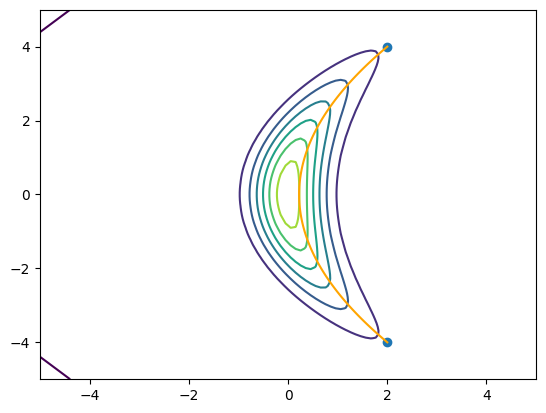

In [6]:
# test interpolation
t = torch.linspace(0.,1.,100)


geodesic = banana_manifold.geodesic(x0,x1,t)

plt.contour(x_grid, y_grid, density_banana)
plt.plot(geodesic[:,0], geodesic[:,1], color="orange")
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.savefig("results/quadratic_banana/geodesic.eps")
plt.show()

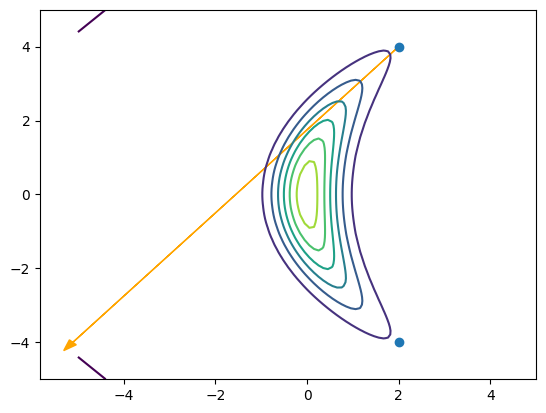

In [7]:
# test logarithmic mapping
logarithmic = banana_manifold.log(x0,x1[None])[0]

plt.contour(x_grid, y_grid, density_banana)
plt.arrow(x0[0], x0[1], logarithmic[0], logarithmic[1], head_width=0.2, color="orange")
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.savefig("results/quadratic_banana/logarithmic.eps")
plt.show()

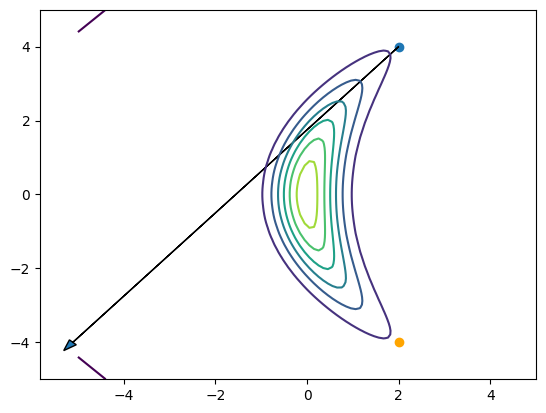

The error between exp_x0(log_x0 (x1)) and x1 is 0.0


In [8]:
# test exponential mapping
# test logarithmic mapping
exponential = banana_manifold.exp(x0,logarithmic[None])[0]

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(x0[0], x0[1])
plt.arrow(x0[0], x0[1], logarithmic[0], logarithmic[1], head_width=0.2)
plt.scatter(exponential[0], exponential[1], color="orange")
plt.savefig("results/quadratic_banana/exponential.eps")
plt.show()
print(f"The error between exp_x0(log_x0 (x1)) and x1 is {torch.norm(exponential - x1)}")

In [9]:
# test distance
l2_distance = torch.norm(x0 - x1)
distance = banana_manifold.distance(x0[None,None], x1[None,None])[0,0,0]
print(l2_distance)
print(distance)

tensor(8.)
tensor(2.)


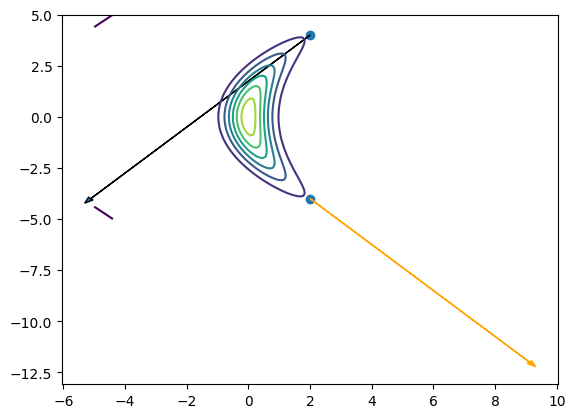

In [10]:
# test parallel transport
parallel_transport = banana_manifold.parallel_transport(x0, logarithmic[None], x1)[0]

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.arrow(x0[0], x0[1], logarithmic[0], logarithmic[1], head_width=0.2)
plt.arrow(x1[0], x1[1], parallel_transport[0], parallel_transport[1], head_width=0.2, color="orange")
plt.savefig("results/quadratic_banana/parallel-transport.eps")
plt.show()


In [11]:
# Riemannian autoencoder
# Ideally, from our manifold, we can give a threshold and that the manifold constructs a RAE